In [1]:
import numpy as np
import pandas as pd
import time

# plots

import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('dielectron.csv')
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [3]:
df.rename(columns={'px1 ':'px1'}, inplace=True)

In [4]:
df.shape

(100000, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Run     100000 non-null  int64  
 1   Event   100000 non-null  int64  
 2   E1      100000 non-null  float64
 3   px1     100000 non-null  float64
 4   py1     100000 non-null  float64
 5   pz1     100000 non-null  float64
 6   pt1     100000 non-null  float64
 7   eta1    100000 non-null  float64
 8   phi1    100000 non-null  float64
 9   Q1      100000 non-null  int64  
 10  E2      100000 non-null  float64
 11  px2     100000 non-null  float64
 12  py2     100000 non-null  float64
 13  pz2     100000 non-null  float64
 14  pt2     100000 non-null  float64
 15  eta2    100000 non-null  float64
 16  phi2    100000 non-null  float64
 17  Q2      100000 non-null  int64  
 18  M       99915 non-null   float64
dtypes: float64(15), int64(4)
memory usage: 14.5 MB


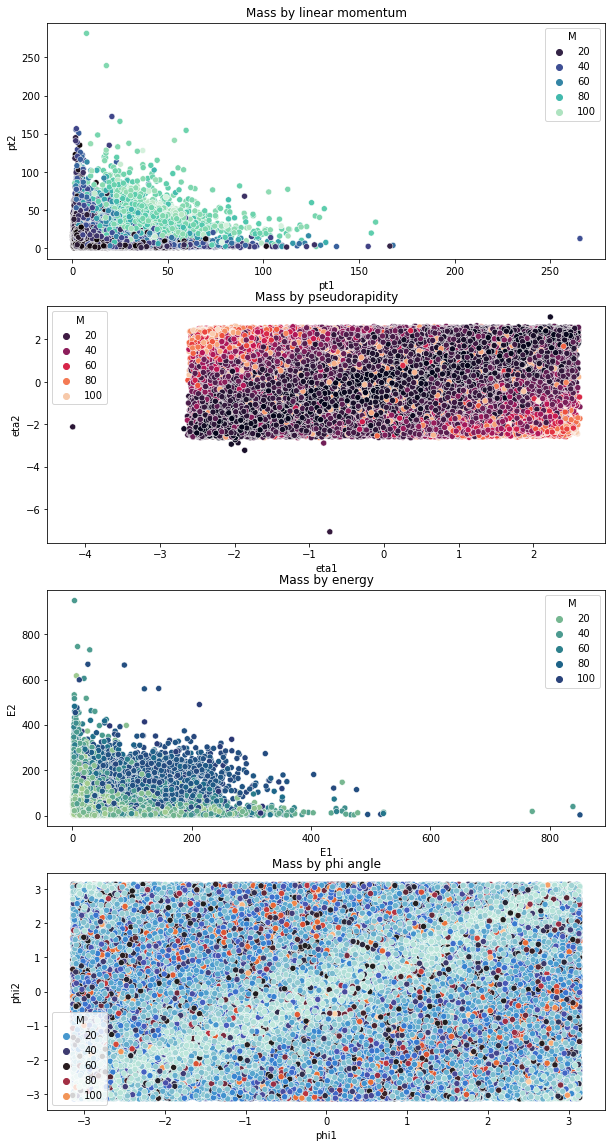

In [6]:
fig,ax = plt.subplots(nrows=4,ncols=1,figsize=(10,20))

sns.scatterplot(ax= ax[0],data=df, x='pt1', y='pt2', hue='M', hue_norm=(df.M.min(),df.M.max()), palette='mako')
ax[0].set_title('Mass by linear momentum')
sns.scatterplot(ax= ax[1],data=df, x='eta1', y='eta2', hue='M', hue_norm=(df.M.min(),df.M.max()), palette='rocket')
ax[1].set_title('Mass by pseudorapidity')
sns.scatterplot(ax= ax[2],data=df, x='E1', y='E2', hue='M', hue_norm=(df.M.min(),df.M.max()), palette='crest')
ax[2].set_title('Mass by energy')
sns.scatterplot(ax= ax[3],data=df, x='phi1', y='phi2', hue='M', hue_norm=(df.M.min(),df.M.max()), palette='icefire')
ax[3].set_title('Mass by phi angle')

plt.show()

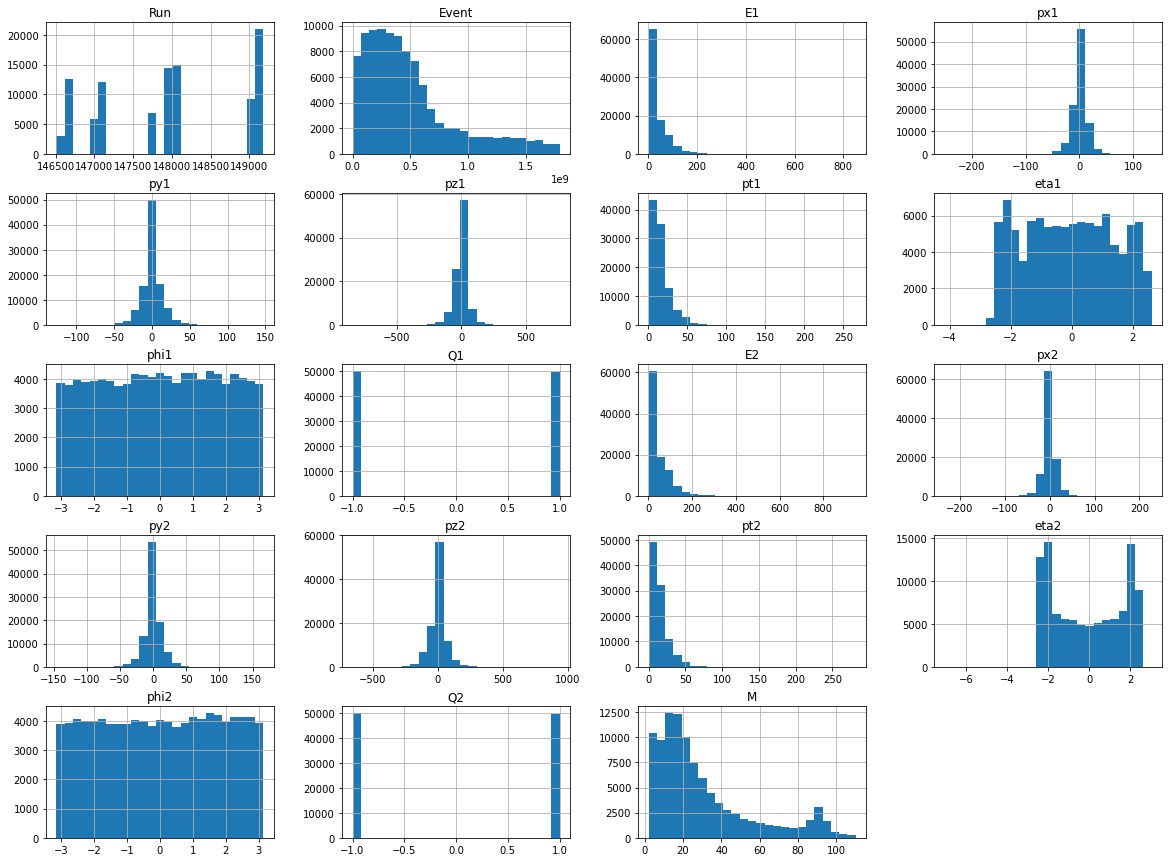

In [7]:
df.hist(bins=25, figsize=(20, 15))
plt.show()

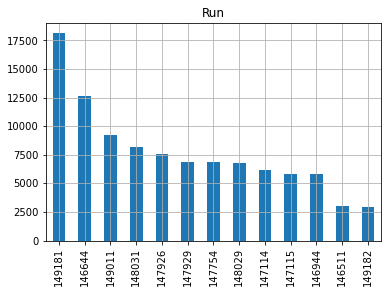

In [8]:
df.Run.value_counts().plot(kind='bar')
plt.grid()
plt.title('Run')
plt.show()

In [9]:
multis = df.Event.value_counts() 
multis = multis[multis.values>1] 
multis

439950319    3
440012942    3
542369397    2
541746848    2
407103633    2
407076179    2
406690266    2
338078762    2
337851094    2
337653458    2
337473110    2
518989177    2
541698960    2
519135297    2
541649129    2
418006834    2
542510767    2
542302783    2
541673578    2
541668133    2
541754934    2
541661621    2
Name: Event, dtype: int64

In [10]:
multis_ids = multis.index.to_list()
print(multis_ids)

df[df.Event.isin(multis_ids)].sort_values('Event')

[439950319, 440012942, 542369397, 541746848, 407103633, 407076179, 406690266, 338078762, 337851094, 337653458, 337473110, 518989177, 541698960, 519135297, 541649129, 418006834, 542510767, 542302783, 541673578, 541668133, 541754934, 541661621]


,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
97032,146511,337473110,15.71730,2.243060,-2.982110,15.26790,3.73153,2.116690,-0.925907,1,56.61260,-19.624500,5.329360,-52.83430,20.33530,-1.683080,2.876420,1,59.26850
96984,146511,337473110,15.71730,2.243060,-2.982110,15.26790,3.73153,2.116690,-0.925907,1,56.61260,-19.624500,5.329360,-52.83430,20.33530,-1.683080,2.876420,1,59.26850
97033,146511,337653458,17.69410,-4.451330,16.592600,-4.23684,17.17930,-0.244190,1.832900,-1,2.52616,-0.339374,-2.212630,1.17071,2.23851,0.501678,-1.722990,-1,13.02770
96985,146511,337653458,17.69410,-4.451330,16.592600,-4.23684,17.17930,-0.244190,1.832900,-1,2.52616,-0.339374,-2.212630,1.17071,2.23851,0.501678,-1.722990,-1,13.02770
96986,146511,337851094,3.85730,1.011940,-3.335790,1.65144,3.48590,0.457610,-1.276260,1,38.52790,-20.602700,-3.118160,32.40680,20.83730,1.225010,-2.991390,1,14.52880
97034,146511,337851094,3.85730,1.011940,-3.335790,1.65144,3.48590,0.457610,-1.276260,1,38.52790,-20.602700,-3.118160,32.40680,20.83730,1.225010,-2.991390,1,14.52880
97035,146511,338078762,18.47870,5.565370,11.268000,13.54700,12.56740,0.935430,1.112030,-1,11.90390,4.304320,-1.136620,-11.04010,4.45186,-1.639740,-0.258172,-1,26.77250
96987,146511,338078762,18.47870,5.565370,11.268000,13.54700,12.56740,0.935430,1.112030,-1,11.90390,4.304320,-1.136620,-11.04010,4.45186,-1.639740,-0.258172,-1,26.77250
97015,146511,406690266,12.43280,-2.900320,1.974970,11.92740,3.50890,1.937650,2.543770,-1,128.67400,21.211400,-11.920200,126.35300,24.33130,2.349610,-0.511986,1,18.85660
96988,146511,406690266,12.43280,-2.900320,1.974970,11.92740,3.50890,1.937650,2.543770,-1,128.67400,21.211400,-11.920200,126.35300,24.33130,2.349610,-0.511986,1,18.85660


In [11]:
df[df.Event==418006834]

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
39064,147114,418006834,18.7789,5.74359,7.40263,-16.27450,9.36951,-1.319410,0.910934,1,61.61360,23.14570,5.76582,-56.80910,23.8530,-1.602350,0.244141,1,10.66540
79612,148029,418006834,21.8398,-19.43140,-9.03848,-4.20742,21.43070,-0.195087,-2.706210,-1,7.19454,-6.13848,-1.89557,-3.23839,6.4245,-0.484849,-2.842080,1,3.76546


In [12]:
df.loc[39064,'Event'] = 418006833 # use a number that is not yet in use!
# and adjust our duplicate list
multis_ids.remove(418006834)
# check:
df[df.Event==418006834]

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
79612,148029,418006834,21.8398,-19.4314,-9.03848,-4.20742,21.4307,-0.195087,-2.70621,-1,7.19454,-6.13848,-1.89557,-3.23839,6.4245,-0.484849,-2.84208,1,3.76546


In [13]:
df = df.drop_duplicates(subset='Event')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99977 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     99977 non-null  int64  
 1   Event   99977 non-null  int64  
 2   E1      99977 non-null  float64
 3   px1     99977 non-null  float64
 4   py1     99977 non-null  float64
 5   pz1     99977 non-null  float64
 6   pt1     99977 non-null  float64
 7   eta1    99977 non-null  float64
 8   phi1    99977 non-null  float64
 9   Q1      99977 non-null  int64  
 10  E2      99977 non-null  float64
 11  px2     99977 non-null  float64
 12  py2     99977 non-null  float64
 13  pz2     99977 non-null  float64
 14  pt2     99977 non-null  float64
 15  eta2    99977 non-null  float64
 16  phi2    99977 non-null  float64
 17  Q2      99977 non-null  int64  
 18  M       99892 non-null  float64
dtypes: float64(15), int64(4)
memory usage: 15.3 MB


In [15]:
print(df.isnull().sum())

Run       0
Event     0
E1        0
px1       0
py1       0
pz1       0
pt1       0
eta1      0
phi1      0
Q1        0
E2        0
px2       0
py2       0
pz2       0
pt2       0
eta2      0
phi2      0
Q2        0
M        85
dtype: int64


In [16]:
print(df.isnull().all())

Run      False
Event    False
E1       False
px1      False
py1      False
pz1      False
pt1      False
eta1     False
phi1     False
Q1       False
E2       False
px2      False
py2      False
pz2      False
pt2      False
eta2     False
phi2     False
Q2       False
M        False
dtype: bool


In [17]:
df["M"].fillna(df["M"].median(),inplace=True)
print(df.isnull().sum()) 

Run      0
Event    0
E1       0
px1      0
py1      0
pz1      0
pt1      0
eta1     0
phi1     0
Q1       0
E2       0
px2      0
py2      0
pz2      0
pt2      0
eta2     0
phi2     0
Q2       0
M        0
dtype: int64


In [18]:
df = df.dropna(subset='M')

In [19]:
print(df.isnull().sum()) 

Run      0
Event    0
E1       0
px1      0
py1      0
pz1      0
pt1      0
eta1     0
phi1     0
Q1       0
E2       0
px2      0
py2      0
pz2      0
pt2      0
eta2     0
phi2     0
Q2       0
M        0
dtype: int64


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99977 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     99977 non-null  int64  
 1   Event   99977 non-null  int64  
 2   E1      99977 non-null  float64
 3   px1     99977 non-null  float64
 4   py1     99977 non-null  float64
 5   pz1     99977 non-null  float64
 6   pt1     99977 non-null  float64
 7   eta1    99977 non-null  float64
 8   phi1    99977 non-null  float64
 9   Q1      99977 non-null  int64  
 10  E2      99977 non-null  float64
 11  px2     99977 non-null  float64
 12  py2     99977 non-null  float64
 13  pz2     99977 non-null  float64
 14  pt2     99977 non-null  float64
 15  eta2    99977 non-null  float64
 16  phi2    99977 non-null  float64
 17  Q2      99977 non-null  int64  
 18  M       99977 non-null  float64
dtypes: float64(15), int64(4)
memory usage: 15.3 MB


In [21]:
df_norm = df.copy()

In [22]:
datcorr = df.drop(["Run","Event"],axis=1)

In [23]:
corrPe= datcorr.corr(method="pearson")

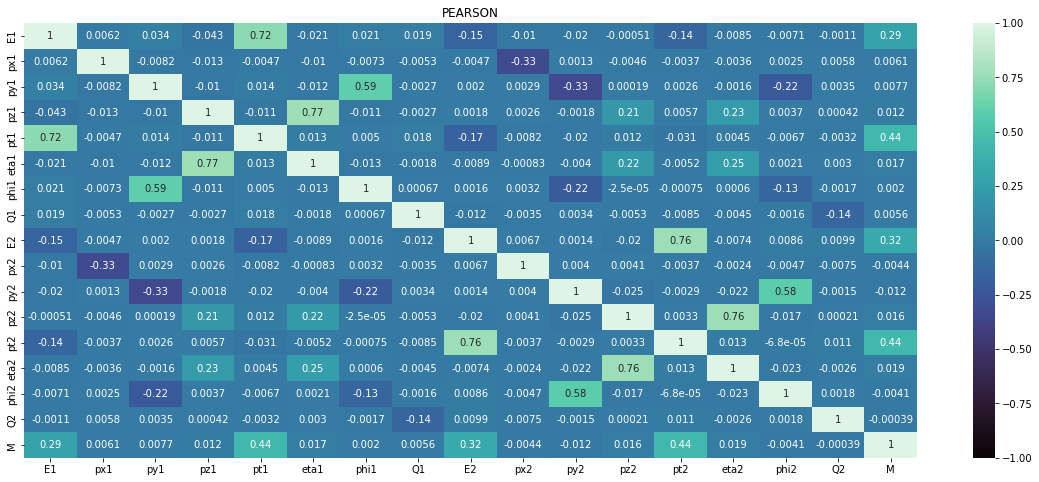

In [24]:
figure = plt.figure(figsize=(20,8))
sns.heatmap(corrPe,annot=True,vmin=-1,center=0,vmax=1, cmap='mako')
plt.title("PEARSON")
plt.show()

E1 and pt1, py1 and phi1, pz1 and eta1, E2 and pt2, py2 and phi2, pz2 and eta2 

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = df.columns
vif["vif_Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif

,features,vif_Factor
0,Run,5.145956
1,Event,2.531218
2,E1,2.160504
3,px1,1.119903
4,py1,1.661302
5,pz1,2.486415
6,pt1,2.553858
7,eta1,2.508153
8,phi1,1.546629
9,Q1,1.020961


VIF > 10 is our threshold for multicollinearity, seems we can use most of the features here without issues.

In [26]:
features = ['E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 
                'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2']

In [27]:
Dataset = df.copy()

We don't need Run and Event, And as Q1 and Q2 are the charges of the 2 electrons we can drop them as well.

In [28]:
Dataset = Dataset.drop(["Run","Event","Q1","Q2"],axis=1)

This time, We do the Feature Engineering for low correlated features

In [29]:
Dataset['px12'] = Dataset.px1 * Dataset.px2
Dataset['py12'] = Dataset.py1 * Dataset.py2
Dataset['pz12'] = Dataset.pz1 * Dataset.pz2
Dataset['pt12'] = Dataset.pt1 * Dataset.pt2
Dataset['eta12'] = Dataset.eta1 * Dataset.eta2
Dataset['phi12'] = Dataset.phi1 * Dataset.phi2
Dataset['E12'] = Dataset.E1 * Dataset.E2

In [30]:
corrD = Dataset.copy()
corrD = corrD.drop(features, axis=1)

In [31]:
newdf = corrD.copy()

In [32]:
corrPe= corrD.corr(method="pearson")

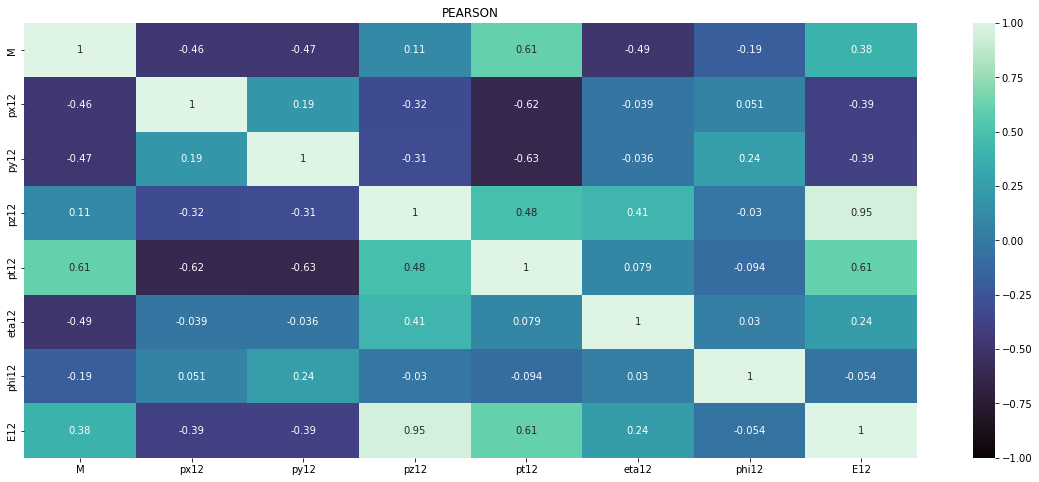

In [33]:
figure = plt.figure(figsize=(20,8))
sns.heatmap(corrPe,annot=True,vmin=-1,center=0,vmax=1, cmap='mako')
plt.title("PEARSON")
plt.show()

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = Dataset.columns
vif["vif_Factor"] = [variance_inflation_factor(Dataset.values, i) for i in range(Dataset.shape[1])]
vif

,features,vif_Factor
0,E1,6.223615
1,px1,1.120964
2,py1,1.662400
3,pz1,2.489760
4,pt1,9.823657
5,eta1,2.516451
6,phi1,1.547740
7,E2,8.064777
8,px2,1.120463
9,py2,1.616863


Seems like pz12 and E12 have multicollinearity problems, pz12 has 0.11 and E12 has 0.38 corr with M we drop them.

In [35]:
Dataset = Dataset.drop(['E12', 'pz12'], axis=1)

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = Dataset.columns
vif["vif_Factor"] = [variance_inflation_factor(Dataset.values, i) for i in range(Dataset.shape[1])]
vif

,features,vif_Factor
0,E1,4.617487
1,px1,1.120925
2,py1,1.662349
3,pz1,2.489715
4,pt1,6.970982
5,eta1,2.516421
6,phi1,1.547692
7,E2,6.067111
8,px2,1.120220
9,py2,1.616393


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.cross_decomposition import PLSRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor


In [34]:
Y = Dataset['M']
X = Dataset.drop("M", axis=1)

In [35]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [36]:
params = {
"depth": [2, 3, 4, 5, 6],
"learning_rate": [0.1, 0.01, 0.3, 0.5, 0.6]
}

In [38]:
catbr = CatBoostRegressor(verbose=False)

In [39]:
RSC = RandomizedSearchCV(catbr, params, cv=5, verbose=False).fit(X_Train, Y_Train)

In [41]:
print(RSC.best_params_)

{'learning_rate': 0.3, 'depth': 5}


In [42]:
CBR = CatBoostRegressor(depth=5,learning_rate =0.3, verbose=False).fit(X_Train, Y_Train)

In [45]:
XVAL = cross_val_score(CBR,X_Test,Y_Test, cv=10, scoring="r2").mean()
print(XVAL)

0.9956601991822536


In [46]:
errorscore = -cross_val_score(CBR,X_Test,Y_Test, cv=10, scoring="neg_mean_squared_error").mean()
print(np.sqrt(errorscore))

1.648994221022488


In [37]:
#bagg = BaggingRegressor(base_estimator=SVR(),n_estimators=10, random_state=0).fit(X_Train,Y_Train)
Dtr = DecisionTreeRegressor(random_state=42).fit(X_Train,Y_Train)
catbr = CatBoostRegressor(verbose=False, random_state=42).fit(X_Train,Y_Train)
elasticnet = ElasticNet(random_state =42).fit(X_Train,Y_Train)
gbmr = GradientBoostingRegressor(verbose=False).fit(X_Train,Y_Train)
knnr = KNeighborsRegressor().fit(X_Train,Y_Train)
lasso = Lasso().fit(X_Train,Y_Train)
lgbmr = LGBMRegressor().fit(X_Train,Y_Train)
pls = PLSRegression().fit(X_Train,Y_Train)
rfr = RandomForestRegressor(max_depth=5, random_state=42).fit(X_Train,Y_Train)
ridge = Ridge().fit(X_Train,Y_Train)
xgbr = XGBRegressor(verbose=False).fit(X_Train, Y_Train)

In [38]:
models = [Dtr, catbr, elasticnet, gbmr, knnr, lasso, lgbmr, pls, rfr, ridge, xgbr]
for model in models:
    name = model.__class__.__name__
    R2CV = cross_val_score(model, X_Test, Y_Test,cv=10,scoring="r2").mean()
    error = -cross_val_score(model, X_Test, Y_Test, cv=10,scoring="neg_mean_squared_error").mean()
    print("Name: " + name + " R2 Score: {:.5f} RMSE: {:.5f}".format(R2CV, np.sqrt(error)))

Name: DecisionTreeRegressor R2 Score: 0.96561 RMSE: 4.63771
Name: CatBoostRegressor R2 Score: 0.99525 RMSE: 1.72362
Name: ElasticNet R2 Score: 0.81862 RMSE: 10.65576
Name: GradientBoostingRegressor R2 Score: 0.98021 RMSE: 3.52103
Name: KNeighborsRegressor R2 Score: 0.78365 RMSE: 11.63721
Name: Lasso R2 Score: 0.82098 RMSE: 10.58603
Name: LGBMRegressor R2 Score: 0.99193 RMSE: 2.24771
Name: PLSRegression R2 Score: 0.79848 RMSE: 11.23133
Name: RandomForestRegressor R2 Score: 0.91721 RMSE: 7.19768
Name: Ridge R2 Score: 0.82160 RMSE: 10.56741
Name: XGBRegressor R2 Score: 0.99013 RMSE: 2.48526


Catboost, XGBoost and LGBM have a good R2 score, CATboost being the best 

In [39]:
from sklearn.neural_network import MLPRegressor
MLPregr = MLPRegressor(random_state=1, max_iter=500, early_stopping=True).fit(X_Train,Y_Train)

d:\Anaconda\envs\pytorch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
d:\Anaconda\envs\pytorch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
d:\Anaconda\envs\pytorch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
d:\Anaconda\envs\pytorch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
d:\Anaconda\envs\pytorch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
d:\Anaconda\envs\pytorch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature nam

In [40]:
name = MLPregr.__class__.__name__
R2CV = cross_val_score(MLPregr, X_Test, Y_Test,cv=10,scoring="r2").mean()
error = -cross_val_score(MLPregr, X_Test, Y_Test, cv=10,scoring="neg_mean_squared_error").mean()
print("Name: " + name + " R2 Score: {:.5f} RMSE: {:.5f}".format(R2CV, np.sqrt(error)))

d:\Anaconda\envs\pytorch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
d:\Anaconda\envs\pytorch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
d:\Anaconda\envs\pytorch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
d:\Anaconda\envs\pytorch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
d:\Anaconda\envs\pytorch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
d:\Anaconda\envs\pytorch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature nam

Name: MLPRegressor R2 Score: 0.98369 RMSE: 3.19562


d:\Anaconda\envs\pytorch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [36]:
params = {
"depth": [ 3, 4, 5, 6, 10],
"learning_rate": [0.1, 0.01, 0.3, 0.5,]
}

In [58]:
catbr = CatBoostRegressor(verbose=False)
lgbmr = LGBMRegressor(verbose=3)
xgbr = XGBRegressor()

In [38]:
RSC_cat = RandomizedSearchCV(catbr, params, cv=5, verbose=False).fit(X_Train, Y_Train)

In [39]:
print(RSC_cat.best_params_)

{'learning_rate': 0.1, 'depth': 10}


In [43]:
Xg_params = {
"max_depth": [ 3, 4, 5, 6, 10],
"learning_rate": [0.1, 0.01,0.05, 0.3, 0.5,]
}

In [46]:
RSC_xgb = RandomizedSearchCV(xgbr, param_distributions=Xg_params, cv=5, verbose=3).fit(X_Train, Y_Train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[11:40:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5] END ....learning_rate=0.5, max_depth=5;, score=0.992 total time=   7.2s
[11:40:43] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5] END ....learning_

In [47]:
print(RSC_xgb.best_params_)

{'max_depth': 10, 'learning_rate': 0.3}


In [54]:
Lg_params = {
"max_depth": [3, 4, 5, 6, 10],
"learning_rate": [0.1, 0.01,0.05, 0.3, 0.5]
}

In [59]:
RSC_lgbm = RandomizedSearchCV(lgbmr, param_distributions=Lg_params, cv = 5, n_iter=100,verbose=1).fit(X_Train, Y_Train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.000000
[LightGBM] [Debug] init for col-wise cost 0.000111 seconds, init for row-wise cost 0.003070 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 63984, number of used features: 19
[LightGBM] [Info] Start training from score 30.096766
[LightGBM] [Debug] Trained a tree with leaves = 8 and depth = 3
[LightGBM] [Debug] Trained a tree with leaves = 8 and depth = 3
[LightGBM] [Debug] Trained a tree with leaves = 8 and depth = 3
[LightGBM] [Debug] Trained a tree with leaves = 8 and depth = 3
[LightGBM] [Debug] Trained a tree with leaves = 8 and depth = 3
[LightGBM] [Debug] Trained a tree with leaves = 8 and depth = 3
[LightGBM] [Debug] Trained a tr

In [60]:
print(RSC_lgbm.best_params_)

{'max_depth': 10, 'learning_rate': 0.3}


CatBoost with simple tuned HyperParameters

In [61]:
catbr = CatBoostRegressor(depth=10, learning_rate=0.1,verbose=False, random_state=42).fit(X_Train,Y_Train)

In [63]:
xgbr = XGBRegressor(max_depth= 10, learning_rate=0.3).fit(X_Train, Y_Train)

In [64]:
lgbmr = LGBMRegressor(max_depth= 10, learning_rate=0.3, verbose=1).fit(X_Train,Y_Train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 79981, number of used features: 19
[LightGBM] [Info] Start training from score 30.079554


In [65]:
models = [catbr,lgbmr, xgbr]
for model in models:
    name = model.__class__.__name__
    R2CV = cross_val_score(model, X_Test, Y_Test,cv=10,scoring="r2").mean()
    error = -cross_val_score(model, X_Test, Y_Test, cv=10,scoring="neg_mean_squared_error").mean()
    print("Name: " + name + " R2 Score: {:.5f} RMSE: {:.5f}".format(R2CV, np.sqrt(error)))

Name: CatBoostRegressor R2 Score: 0.99475 RMSE: 1.81276
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 17996, number of used features: 19
[LightGBM] [Info] Start training from score 29.747980
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of t

In [66]:
import shap

In [67]:
explainer = shap.Explainer(catbr)
shap_values = explainer(X_Test)

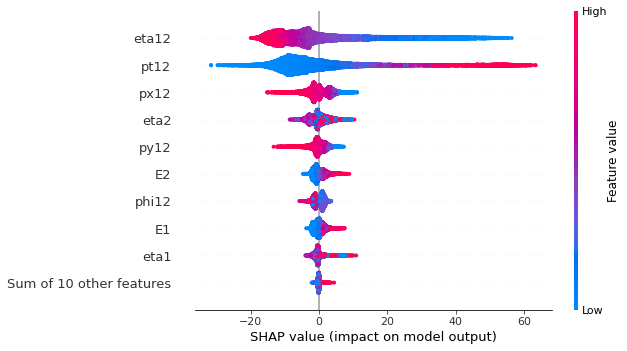

In [68]:
shap.plots.beeswarm(shap_values)

In [77]:
y_pred = catbr.predict(X_Test)

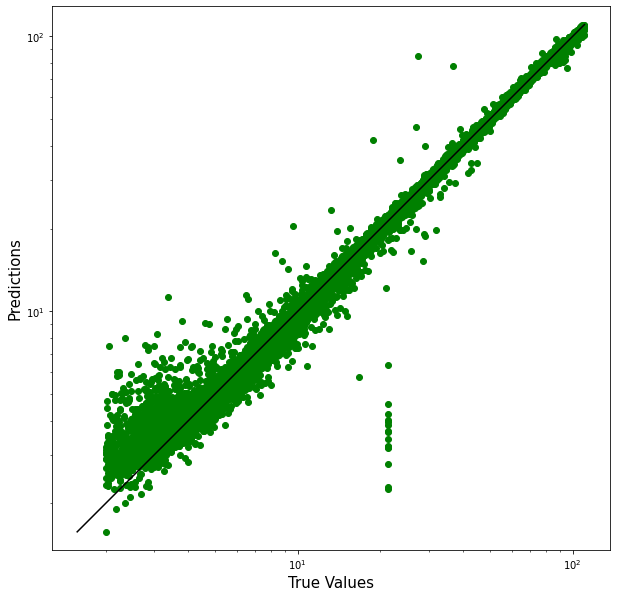

In [81]:
plt.figure(figsize=(10,10))
plt.scatter(Y_Test, y_pred, c='green')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(Y_Test))
p2 = min(min(y_pred), min(Y))
plt.plot([p1, p2], [p1, p2], 'black')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [21]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99892 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     99892 non-null  int64  
 1   Event   99892 non-null  int64  
 2   E1      99892 non-null  float64
 3   px1     99892 non-null  float64
 4   py1     99892 non-null  float64
 5   pz1     99892 non-null  float64
 6   pt1     99892 non-null  float64
 7   eta1    99892 non-null  float64
 8   phi1    99892 non-null  float64
 9   Q1      99892 non-null  int64  
 10  E2      99892 non-null  float64
 11  px2     99892 non-null  float64
 12  py2     99892 non-null  float64
 13  pz2     99892 non-null  float64
 14  pt2     99892 non-null  float64
 15  eta2    99892 non-null  float64
 16  phi2    99892 non-null  float64
 17  Q2      99892 non-null  int64  
 18  M       99892 non-null  float64
dtypes: float64(15), int64(4)
memory usage: 15.2 MB


In [46]:
from sklearn import preprocessing
Y = Dataset['M']
X = Dataset.drop("M", axis=1)

def normalize(df):
    from sklearn.preprocessing import MaxAbsScaler
    scaler = MaxAbsScaler()
    scaler.fit(df)
    scaled = scaler.transform(df)
    scaled_df = pd.DataFrame(scaled, columns=df.columns)
    return scaled_df

X=normalize(X)

In [47]:
X.head()

,E1,px1,py1,pz1,pt1,eta1,phi1,E2,px2,py2,pz2,pt2,eta2,phi2,px12,py12,pt12,eta12,phi12
0,0.069027,-0.029177,0.071413,-0.068131,0.048273,-0.528804,0.693173,0.011898,-0.004417,-0.011310,-0.011841,0.007617,-0.331790,-0.659799,0.001124,-0.003056,0.002990,0.584978,-0.458545
1,0.007773,-0.016570,-0.003932,-0.006079,0.015786,-0.246897,-0.955838,0.018083,-0.050116,0.030338,0.012254,0.045281,0.114381,0.870556,0.007245,-0.000451,0.005812,-0.094156,-0.834275
2,0.030028,-0.045816,0.013845,0.027021,0.043908,0.341021,0.943984,0.016681,-0.006301,0.013585,-0.016663,0.009574,-0.347509,0.683914,0.002519,0.000712,0.003418,-0.395119,0.647284
3,0.076882,0.029978,0.080609,0.075942,0.052948,0.532576,0.320606,0.026495,0.017490,0.015614,0.026355,0.017194,0.329834,0.180121,0.004574,0.004763,0.007403,0.585676,0.057898
4,0.072243,0.011784,-0.099159,-0.070883,0.056171,-0.502655,-0.436576,0.014643,-0.001188,-0.014587,-0.014612,0.008668,-0.343068,-0.536294,-0.000122,0.005474,0.003959,0.574950,0.234743


In [48]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [49]:
Dtr = DecisionTreeRegressor(random_state=42).fit(X_Train,Y_Train)
catbr = CatBoostRegressor(verbose=False, random_state=42).fit(X_Train,Y_Train)
elasticnet = ElasticNet(random_state =42).fit(X_Train,Y_Train)
gbmr = GradientBoostingRegressor(verbose=False).fit(X_Train,Y_Train)
knnr = KNeighborsRegressor().fit(X_Train,Y_Train)
lasso = Lasso().fit(X_Train,Y_Train)
lgbmr = LGBMRegressor().fit(X_Train,Y_Train)
pls = PLSRegression().fit(X_Train,Y_Train)
rfr = RandomForestRegressor(random_state=42).fit(X_Train,Y_Train)
ridge = Ridge().fit(X_Train,Y_Train)
xgbr = XGBRegressor(verbose=False).fit(X_Train, Y_Train)

[16:59:41] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [50]:
models = [Dtr, catbr, elasticnet, gbmr, knnr, lasso, lgbmr, pls, rfr, ridge, xgbr]
for model in models:
    name = model.__class__.__name__
    R2CV = cross_val_score(model, X_Test, Y_Test,cv=10,scoring="r2").mean()
    error = -cross_val_score(model, X_Test, Y_Test, cv=10,scoring="neg_mean_squared_error").mean()
    print("Name: " + name + " R2 Score: {:.5f} RMSE: {:.5f}".format(R2CV, np.sqrt(error)))

Name: DecisionTreeRegressor R2 Score: 0.96737 RMSE: 4.55682
Name: CatBoostRegressor R2 Score: 0.99661 RMSE: 1.46851
Name: ElasticNet R2 Score: 0.06459 RMSE: 24.41542
Name: GradientBoostingRegressor R2 Score: 0.98012 RMSE: 3.55532
Name: KNeighborsRegressor R2 Score: 0.81696 RMSE: 10.79331
Name: Lasso R2 Score: 0.23905 RMSE: 22.02371
Name: LGBMRegressor R2 Score: 0.99283 RMSE: 2.13657
Name: PLSRegression R2 Score: 0.79675 RMSE: 11.37419
Name: RandomForestRegressor R2 Score: 0.98572 RMSE: 3.01403
Name: Ridge R2 Score: 0.81898 RMSE: 10.73465
[17:19:17] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:19:20] WARNING: C:/Users/administrat

In [38]:
def train_models(X_Train, Y_Train, X_Test, Y_Test):
    Dtr = DecisionTreeRegressor(random_state=42).fit(X_Train,Y_Train)
    catbr = CatBoostRegressor(verbose=False, random_state=42).fit(X_Train,Y_Train)
    elasticnet = ElasticNet(random_state =42).fit(X_Train,Y_Train)
    gbmr = GradientBoostingRegressor(verbose=False).fit(X_Train,Y_Train)
    knnr = KNeighborsRegressor().fit(X_Train,Y_Train)
    lasso = Lasso().fit(X_Train,Y_Train)
    lgbmr = LGBMRegressor().fit(X_Train,Y_Train)
    pls = PLSRegression().fit(X_Train,Y_Train)
    rfr = RandomForestRegressor(random_state=42).fit(X_Train,Y_Train)
    ridge = Ridge().fit(X_Train,Y_Train)
    xgbr = XGBRegressor().fit(X_Train, Y_Train)

    models = [Dtr, catbr, elasticnet, gbmr, knnr, lasso, lgbmr, pls, rfr, ridge, xgbr]
    for model in models:
        name = model.__class__.__name__
        R2CV = cross_val_score(model, X_Test, Y_Test,cv=10,scoring="r2").mean()
        error = -cross_val_score(model, X_Test, Y_Test, cv=10,scoring="neg_mean_squared_error").mean()
        print("Name: " + name + " R2 Score: {:.5f} RMSE: {:.5f}".format(R2CV, np.sqrt(error)))

In [39]:
Y = Dataset['M']
X = Dataset.drop("M", axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
def normalize(df, scaler):
    scaler.fit(df)
    scaled = scaler.transform(df)
    scaled_df = pd.DataFrame(scaled, columns=df.columns)
    return scaled_df

X=normalize(X, scaler)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [40]:
train_models(X_Train,Y_Train,X_Test,Y_Test)

Name: DecisionTreeRegressor R2 Score: 0.96550 RMSE: 4.64553
Name: CatBoostRegressor R2 Score: 0.99525 RMSE: 1.72468
Name: ElasticNet R2 Score: 0.73834 RMSE: 12.79935
Name: GradientBoostingRegressor R2 Score: 0.98023 RMSE: 3.51463
Name: KNeighborsRegressor R2 Score: 0.91574 RMSE: 7.26200
Name: Lasso R2 Score: 0.81245 RMSE: 10.83539
Name: LGBMRegressor R2 Score: 0.99192 RMSE: 2.24821
Name: PLSRegression R2 Score: 0.79848 RMSE: 11.23133
Name: RandomForestRegressor R2 Score: 0.98450 RMSE: 3.11470
Name: Ridge R2 Score: 0.82160 RMSE: 10.56740
Name: XGBRegressor R2 Score: 0.99020 RMSE: 2.47696


In [41]:
Y = Dataset['M']
X = Dataset.drop("M", axis=1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
def normalize(df, scaler):
    scaler.fit(df)
    scaled = scaler.transform(df)
    scaled_df = pd.DataFrame(scaled, columns=df.columns)
    return scaled_df

X=normalize(X, scaler)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [42]:
train_models(X_Train,Y_Train,X_Test,Y_Test)

Name: DecisionTreeRegressor R2 Score: 0.96512 RMSE: 4.67114
Name: CatBoostRegressor R2 Score: 0.99531 RMSE: 1.71376
Name: ElasticNet R2 Score: 0.02103 RMSE: 24.75876
Name: GradientBoostingRegressor R2 Score: 0.98027 RMSE: 3.51316
Name: KNeighborsRegressor R2 Score: 0.85368 RMSE: 9.56958
Name: Lasso R2 Score: 0.18641 RMSE: 22.57125
Name: LGBMRegressor R2 Score: 0.99198 RMSE: 2.23933
Name: PLSRegression R2 Score: 0.79848 RMSE: 11.23133
Name: RandomForestRegressor R2 Score: 0.98452 RMSE: 3.11313
Name: Ridge R2 Score: 0.82112 RMSE: 10.58139
Name: XGBRegressor R2 Score: 0.99016 RMSE: 2.48290


In [43]:
Y = Dataset['M']
X = Dataset.drop("M", axis=1)
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
def normalize(df, scaler):
    scaler.fit(df)
    scaled = scaler.transform(df)
    scaled_df = pd.DataFrame(scaled, columns=df.columns)
    return scaled_df

X=normalize(X, scaler)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [45]:
train_models(X_Train,Y_Train,X_Test,Y_Test)


Name: DecisionTreeRegressor R2 Score: 0.89769 RMSE: 8.00095
Name: CatBoostRegressor R2 Score: 0.98618 RMSE: 2.94185
Name: ElasticNet R2 Score: 0.05185 RMSE: 24.36581
Name: GradientBoostingRegressor R2 Score: 0.91308 RMSE: 7.37691
Name: KNeighborsRegressor R2 Score: 0.73863 RMSE: 12.79170
Name: Lasso R2 Score: 0.15129 RMSE: 23.05209
Name: LGBMRegressor R2 Score: 0.97254 RMSE: 4.14522
Name: PLSRegression R2 Score: 0.55917 RMSE: 16.61449
Name: RandomForestRegressor R2 Score: 0.96292 RMSE: 4.81752
Name: Ridge R2 Score: 0.57997 RMSE: 16.21841
Name: XGBRegressor R2 Score: 0.96979 RMSE: 4.34759


In [46]:
Y = Dataset['M']
X = Dataset.drop("M", axis=1)
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
def normalize(df, scaler):
    scaler.fit(df)
    scaled = scaler.transform(df)
    scaled_df = pd.DataFrame(scaled, columns=df.columns)
    return scaled_df

X=normalize(X, scaler)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [48]:
train_models(X_Train,Y_Train,X_Test,Y_Test)

Name: DecisionTreeRegressor R2 Score: 0.96549 RMSE: 4.64586
Name: CatBoostRegressor R2 Score: 0.99527 RMSE: 1.72138
Name: ElasticNet R2 Score: 0.78089 RMSE: 11.71397
Name: GradientBoostingRegressor R2 Score: 0.98019 RMSE: 3.52300
Name: KNeighborsRegressor R2 Score: 0.94935 RMSE: 5.63119
Name: Lasso R2 Score: 0.89385 RMSE: 8.15414
Name: LGBMRegressor R2 Score: 0.99189 RMSE: 2.25254
Name: PLSRegression R2 Score: 0.85198 RMSE: 9.62810
Name: RandomForestRegressor R2 Score: 0.98452 RMSE: 3.11281
Name: Ridge R2 Score: 0.92014 RMSE: 7.07145
Name: XGBRegressor R2 Score: 0.99027 RMSE: 2.46876
